In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (7).csv


In [ ]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df=df.drop(['Unnamed: 32'], axis=1)
#(['country','country.1','region',], axis=1)
print(df.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


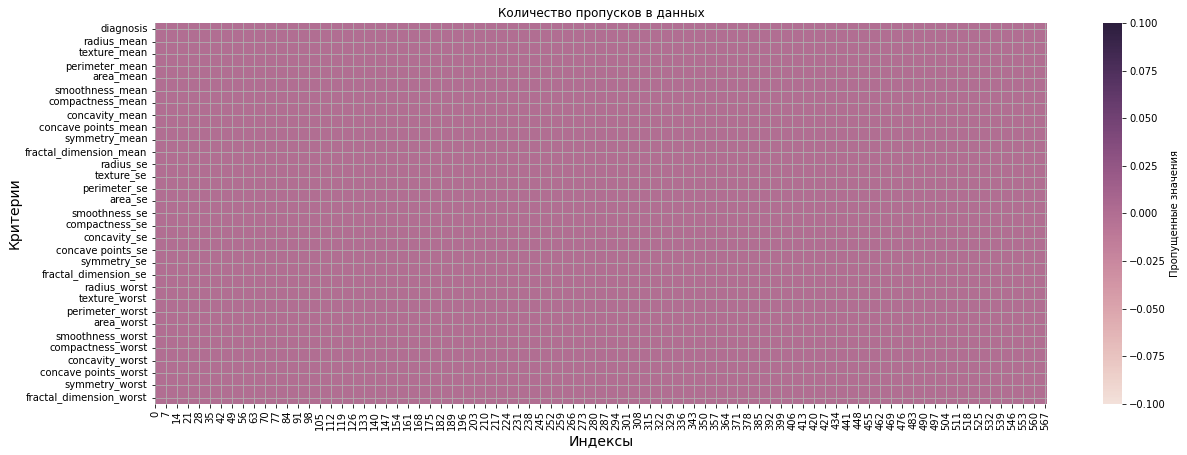

In [ ]:
df=df.drop(['id'],axis=1)
plt.figure(figsize=(20,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

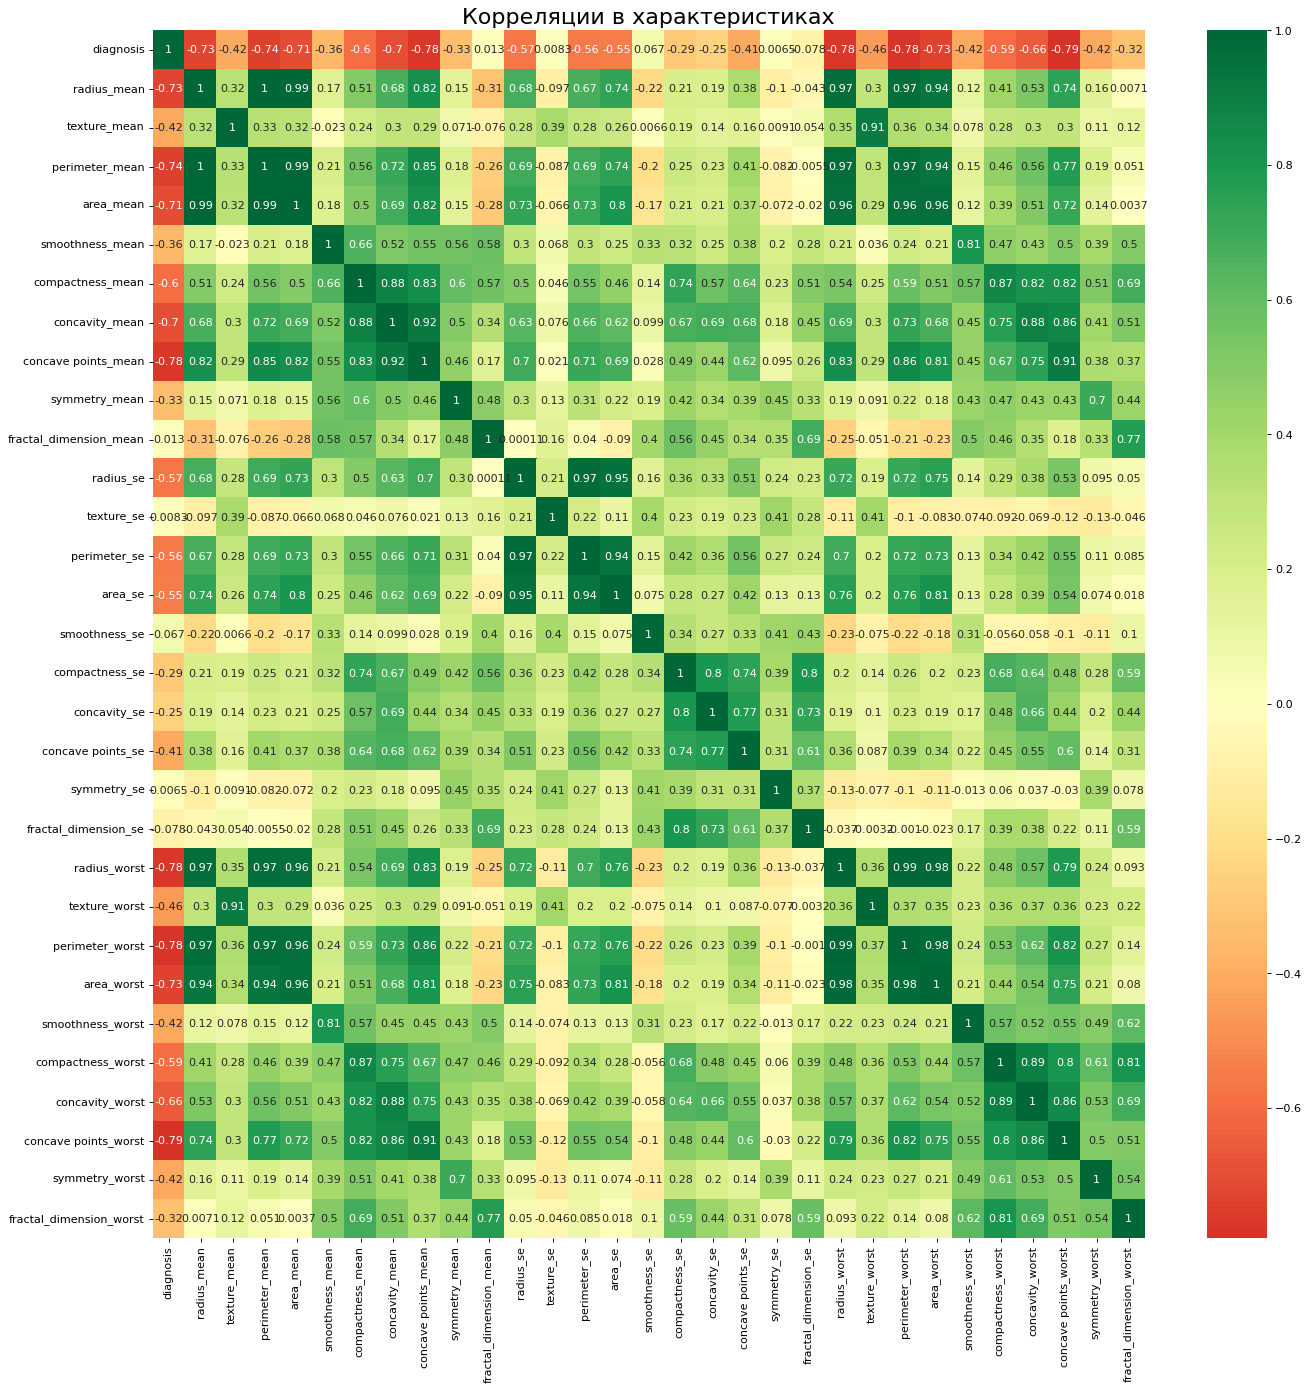

In [ ]:
df['diagnosis'] = pd.factorize(df['diagnosis'])[ 0 ]
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,answers_pred))

0.9532163742690059


In [ ]:
def sum(a,b):
  return a+b

In [ ]:
t = (1,2)

type(t)
()
()
(name, value_c)


tuple

In [ ]:
X_train.keys()

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
w0 = model.intercept_
w1 = model.coef_
w1 = w1.reshape(-1)
mas = []
i = 0
for key in X_train.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
print(w0)
mas

[0.32737883]


[('smoothness_se', -0.005499747615399694),
 ('fractal_dimension_se', -0.006385392723681993),
 ('area_mean', -0.01084634733023445),
 ('fractal_dimension_mean', -0.01657182738756433),
 ('symmetry_se', -0.019118106992005852),
 ('area_worst', -0.019990314819620762),
 ('concave points_se', -0.0226535435126578),
 ('smoothness_mean', -0.0641389063552065),
 ('radius_se', 0.06961755976169905),
 ('compactness_se', -0.06976184880148124),
 ('symmetry_mean', -0.07677996823690082),
 ('concavity_se', -0.08637060152646191),
 ('fractal_dimension_worst', -0.09171497051711952),
 ('area_se', -0.10796001659583974),
 ('smoothness_worst', -0.11363087641184977),
 ('texture_worst', -0.12557663867343047),
 ('concave points_mean', -0.1591362528522525),
 ('texture_mean', -0.24455954890259066),
 ('perimeter_mean', 0.28302257890889615),
 ('compactness_mean', -0.2918654488352185),
 ('symmetry_worst', -0.29320904651957486),
 ('perimeter_se', 0.31257810275666886),
 ('concave points_worst', -0.3244067655989949),
 ('con

In [ ]:
ans = str(w0)
cols=X_train.columns
for i in range(len(w1)):
  print(str(w1[i]), cols[i])

1.5103205653427842 radius_mean
-0.24455954890259066 texture_mean
0.28302257890889615 perimeter_mean
-0.01084634733023445 area_mean
-0.0641389063552065 smoothness_mean
-0.2918654488352185 compactness_mean
-0.3716608328271139 concavity_mean
-0.1591362528522525 concave points_mean
-0.07677996823690082 symmetry_mean
-0.01657182738756433 fractal_dimension_mean
0.06961755976169905 radius_se
1.0338795141603627 texture_se
0.31257810275666886 perimeter_se
-0.10796001659583974 area_se
-0.005499747615399694 smoothness_se
-0.06976184880148124 compactness_se
-0.08637060152646191 concavity_se
-0.0226535435126578 concave points_se
-0.019118106992005852 symmetry_se
-0.006385392723681993 fractal_dimension_se
1.6299125788951119 radius_worst
-0.12557663867343047 texture_worst
-0.3774560120891213 perimeter_worst
-0.019990314819620762 area_worst
-0.11363087641184977 smoothness_worst
-0.9566561242482976 compactness_worst
-1.0759892213219853 concavity_worst
-0.3244067655989949 concave points_worst
-0.2932090

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 63
FP: 6
FN: 2
TP: 100


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
answers_pred = model.predict(X_test)
arr = confusion_matrix(y_test, answers_pred)
arr
   

array([[ 63,   6],
       [  2, 100]])

In [ ]:
print('accuracy:', (arr[0][0]+arr[1][1])/(arr[0][0]+arr[0][1]+arr[1][0]+arr[1][1]))
recall = arr[0][0]/(arr[0][0]+arr[1][0])
precision = arr[0][0]/(arr[0][0]+arr[0][1])
print('recall:', recall)
print('precision:', precision)
print('f1:', 2 * (precision * recall)/(precision+recall))

accuracy: 0.9532163742690059
recall: 0.9692307692307692
precision: 0.9130434782608695
f1: 0.9402985074626865


In [ ]:
print('accuracy:', accuracy_score(y_test, answers_pred))
print('recall:', recall_score(y_test, answers_pred))
print('precision:', precision_score(y_test, answers_pred))
print('f1:', f1_score(y_test, answers_pred))

accuracy: 0.9532163742690059
recall: 0.9803921568627451
precision: 0.9433962264150944
f1: 0.9615384615384616
